<a href="https://colab.research.google.com/github/sumekipark/tensorflow2/blob/main/12%2CTransferLearning_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers import Flatten, Conv2D, MaxPool2D
from keras.applications import MobileNet, Xception, ResNet50, InceptionV3
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# dog_image.zip 파일을 Colab Notebooks 안에 dataset 폴더 만들고, 만들어지  dataset 폴더에서 우클릭한 후 업로드한다.
# /content/gdrive/MyDrive/Colab Notebooks/dataset/dog_image.zip 파일업로드된 전체 경로

In [ ]:
# 파일 다운로드
import shutil
shutil.copy('/content/gdrive/MyDrive/Colab Notebooks/dataset/dog_image.zip','/content/')

'/content/dog_image.zip'

In [ ]:
# root directory 설정
root_dir ='/content'

import os
import shutil

if os.path.exists( os.path.join(root_dir, 'dog_image')):
  shutil.rmtree( os.path.join(root_dir, 'dog_image'))

In [ ]:
import zipfile
with zipfile.ZipFile( os.path.join(root_dir, 'dog_image.zip'),'r') as target_file:
  target_file.extractall( os.path.join(root_dir, 'dog_image'))

In [ ]:
import os
import shutil

if not os.path.exists( os.path.join(root_dir, 'dog_image/test')):
  os.mkdir(os.path.join(root_dir, 'dog_image/test'))

if not os.path.exists( os.path.join(root_dir, 'dog_image/test_image_files')):
  os.mkdir(os.path.join(root_dir, 'dog_image/test_image_files'))

In [ ]:
# 데이터 전체 개수 확인
import os
import glob

label_name_list = os.listdir( os.path.join(root_dir, 'dog_image/train/'))

print('total label nums=', len(label_name_list))
print('=================================')
print(label_name_list)

total label nums= 4
['yorkshire_terrier', 'jindo_dog', 'chihuahua', 'shepherd']


In [ ]:
# train -> test 디렉토리로  ratio  만큼 move
import os
import glob
import shutil

ratio = 0.1 # train : test = 90:10

src_root_dir = os.path.join(root_dir, 'dog_image/train/')
dst_root_dir = os.path.join(root_dir, 'dog_image/test/')

label_name_list = os.listdir(src_root_dir)

for label_name in label_name_list:# test 디렉토리에 label 디렉토리 생성
  dst_label_name_dir = dst_root_dir + label_name
  if not os.path.exists(dst_label_name_dir):
    os.mkdir(dst_label_name_dir)

#파일 move : src dir(train directory) => dst dir(test directory)
for label_name in label_name_list:
  train_image_file_list = glob.glob(src_root_dir + label_name + '/*')
  split_num = int(ratio*len(train_image_file_list))
  test_image_file_list = train_image_file_list[0:split_num]

  for image_file in test_image_file_list:
    shutil.move(image_file, dst_root_dir+label_name) # move

In [ ]:
# train : test 데이터 비율 확인
src_root_dir = os.path.join(root_dir, 'dog_image/train/')
dst_root_dir = os.path.join(root_dir, 'dog_image/test/')

train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(src_root_dir)

train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
  print('fatal error !!!!')
else:
  print(len(train_label_name_list), len(test_label_name_list))

# 데이터 개수 확인
for label_name in train_label_name_list:
  train_data_nums = len(os.listdir(src_root_dir+label_name))
  test_data_nums = len(os.listdir(dst_root_dir+label_name))

  print('train->', label_name, train_data_nums,', test=>', label_name, test_data_nums)
  print('======================')

4 4
train-> chihuahua 329 , test=> chihuahua 36
train-> jindo_dog 324 , test=> jindo_dog 36
train-> shepherd 339 , test=> shepherd 37
train-> yorkshire_terrier 342 , test=> yorkshire_terrier 37


In [ ]:
# test -> test_image_files 디렉토리로 copy
import os
import glob
import shutil

src_root_dir = os.path.join(root_dir, 'dog_image/test/')
dst_root_dir = os.path.join(root_dir, 'dog_image/test_image_files')

label_name_list = os.listdir(src_root_dir)

for label_name in label_name_list: # 파일 카피 : src dir => dst dir
  image_file_list = glob.glob(src_root_dir+label_name+'/*')
  print('totla [%s] image file nums=> [%s]' % (label_name, len(image_file_list)))

  copy_nums = 0

  for image_file in image_file_list:
    shutil.copy(image_file, dst_root_dir) # copy
    copy_nums = copy_nums + 1
  print('total copy nums =>', copy_nums)

totla [yorkshire_terrier] image file nums=> [37]
total copy nums => 37
totla [jindo_dog] image file nums=> [36]
total copy nums => 36
totla [chihuahua] image file nums=> [36]
total copy nums => 36
totla [shepherd] image file nums=> [37]
total copy nums => 37


In [ ]:
# ImageDataGenerator 설정
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMG_WIDTH = 224
IMG_HEIGHT = 224

train_dir = os.path.join(root_dir, 'dog_image/train/')
validation_dir = os.path.join(root_dir, 'dog_image/train/')
test_dir = os.path.join(root_dir, 'dog_image/test/')

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./ 255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2)
                                  #  class_mode='sparse', 
                                  #  subset='training',
                                  #  target_size=(IMG_WIDTH, IMG_HEIGHT))
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, color_mode='rgb',
                                                    class_mode='sparse', subset='training',
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT))

validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=16, color_mode='rgb',
                                                    class_mode='sparse', subset='validation',
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT))

print(train_generator.class_indices)

Found 1334 images belonging to 4 classes.
Found 198 images belonging to 4 classes.
{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}


In [ ]:
#Transer Learning base 모델 구축
from keras.applications.mobilenet import MobileNet

# weights=사전학습 모델,  include_top=False: 사전학습기의 특징추출기만 가져와 사용, True=특징추출기+분류기 둘다 가져오겠다.
# input_shape=새롭게 학습시킬 tensor의 크기 (width,height,channel)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

In [ ]:
import tensorflow as tf

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 32)                1605664   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,834,660
Trainable params: 4,812,772
Non-trainable params: 21,888
_________________________________________

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#모델이 저장될 파일 경로 및 파일명 설정
# epoch수를 2자리 숫자로 표현하고, 검증손실값을 소수 아래 둘째 자리까지 표시 합니다.
save_file_name='save_models/model_{epoch:02d}-{val_loss:.2f}.h5'

checkpoint =ModelCheckpoint(save_file_name,
                            monitor='val_loss',  # 모니터링할 지표 설정
                            verbose= 1,  # 로그 메시지 출력 여부 결정
                            save_best_only=True, # 검증 손실값이 감소한 경우에만 모델을 저장할지 결정
                            mode = 'auto') # 모델 저정조건 지정,mode='min' 지정하면 검증 손실값이 최소되는 경우에 모델 저장
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(train_generator, validation_data = validation_generator,
                 epochs=50, 
                 batch_size= 16, # 시스템 메모리 사이즈로 설정
                 callbacks=[checkpoint, earlystopping])

Epoch 1/50
84/84 [==============================] - ETA: 0s - loss: 1.1907 - accuracy: 0.5375
Epoch 1: val_loss improved from inf to 0.45833, saving model to save_models/model_01-0.46.h5
84/84 [==============================] - 49s 281ms/step - loss: 1.1907 - accuracy: 0.5375 - val_loss: 0.4583 - val_accuracy: 0.8232
Epoch 2/50
84/84 [==============================] - ETA: 0s - loss: 0.5947 - accuracy: 0.7661
Epoch 2: val_loss improved from 0.45833 to 0.24267, saving model to save_models/model_02-0.24.h5
84/84 [==============================] - 20s 233ms/step - loss: 0.5947 - accuracy: 0.7661 - val_loss: 0.2427 - val_accuracy: 0.9343
Epoch 3/50
84/84 [==============================] - ETA: 0s - loss: 0.4316 - accuracy: 0.8501
Epoch 3: val_loss improved from 0.24267 to 0.13667, saving model to save_models/model_03-0.14.h5
84/84 [==============================] - 19s 223ms/step - loss: 0.4316 - accuracy: 0.8501 - val_loss: 0.1367 - val_accuracy: 0.9596
Epoch 4/50
84/84 [=================

In [ ]:
# save model
# model.save('customer_image_classification.model')

Text(0.5, 0, 'epoch')

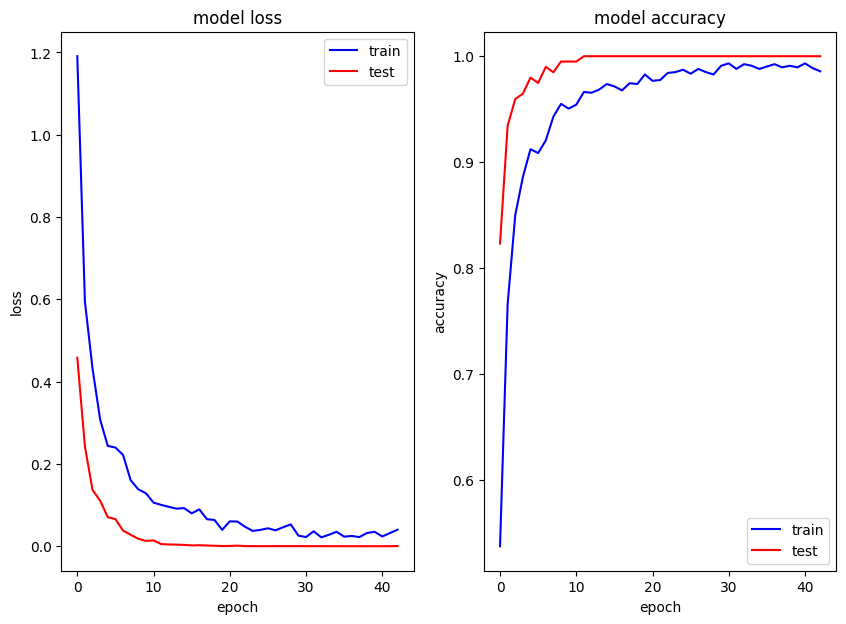

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Trend와 Loss Trend 그래프 
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

# loss
ax[0].set_title('model loss')
ax[0].plot(hist.history['loss'], 'b')
ax[0].plot(hist.history['val_loss'], 'r')
ax[0].legend(['train', 'test'], loc='upper right')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')

# accuracy 
ax[1].set_title('model accuracy')
ax[1].plot(hist.history['accuracy'], 'b')
ax[1].plot(hist.history['val_accuracy'], 'r')
ax[1].legend(['train', 'test'], loc='lower right')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')

In [ ]:
#### test data로 evaluate
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=32, color_mode='rgb',
                                                  class_mode='sparse', target_size=(IMG_WIDTH, IMG_HEIGHT))


In [ ]:
model.evaluate(test_generator)